In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import utils
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
#step 1 input data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# step 1 continues .. define my placeholders

x = tf.placeholder(tf.float32, [None, 784])
actual_y = tf.placeholder(tf.float32, [None,10])

In [6]:
# step 2 - randomly initialize weights

W = tf.Variable(tf.zeros([784,10]), tf.float32)
b = tf.Variable(tf.zeros([10]), tf.float32)

In [8]:
# Step 3 - define my model

predicted_y = tf.matmul(x, W) + b

In [9]:
# Step 4 - Error

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=actual_y, logits=predicted_y))

In [10]:
# step 5 - perform gradient descent

optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
# initialize our session

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [13]:
for i in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(optimizer, feed_dict={x:batch_x, actual_y:batch_y})

In [14]:
from scipy import misc

In [15]:
# input your own image here of a handwritten number, cropped to 28x28 pixels

three = misc.imread('3.png')

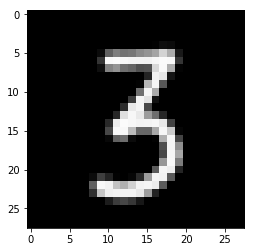

In [17]:
#it should look like the one below
plt.imshow(three)

In [18]:
# use the helper function written in utils.py to convert 
# the image into an array which is 784 pixels long

new_img = utils.prepImage('3.png')

In [20]:
# feed this new image array into the trained model
# and see the highest output - thats what it predicted

sess.run(predicted_y, feed_dict={x: new_img})

array([[ -3.63368487,  -0.87597883,   1.92645037,  12.21197319,
         -6.50765467,   3.94136453,  -4.8993907 ,  -6.61414719,
          5.0830431 ,  -0.63196325]], dtype=float32)

In [21]:
pred = sess.run(predicted_y, feed_dict={x: new_img})

In [22]:
soft = tf.nn.softmax(pred)

In [24]:
sess.run(tf.argmax(soft, axis=1))

array([3])